In [71]:
from bs4 import BeautifulSoup
import requests
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import scipy as sp
import time
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

In [72]:
import matplotlib.pyplot as plt

plt.rcParams['font.serif'] = "Garamond"
plt.rcParams['font.family'] = "serif"

In [73]:
updated_df_2009 = pd.read_csv('updated_dataframe_2009')

updated_df = pd.read_csv('updated_dataframe')

names = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 'black']

In [74]:


conf_indexes_2009 = []
conf_indexes = []
for conf in conferences:
    # Case insensitive partial matching
    mask = updated_df_2009['Conf'].str.contains(conf, case=False, na=False)
    #conf_indexes[conf] = df.index[mask].tolist()
    conf_indexes_2009.append(updated_df_2009.index[mask].tolist())
    #2014
    mask1 = updated_df['Conf'].str.contains(conf, case=False, na=False)
    conf_indexes.append(updated_df.index[mask1].tolist())


In [75]:
collective_data_2014 = []
collective_data_2009 = []
for i in range(len(conferences)):
    collective_data_2009.append(updated_df_2009.iloc[conf_indexes_2009[i], :])
    collective_data_2014.append(updated_df.iloc[conf_indexes[i], :])


In [76]:
# i know make new data frame without teams in the conferences
df_2009 = pd.read_csv('updated_dataframe_2009')
df_2014 = pd.read_csv('updated_dataframe')


for i in range(len(conf_indexes)):
    df_2009.drop(conf_indexes_2009[i], inplace=True)
    df_2014.drop(conf_indexes[i], inplace=True)




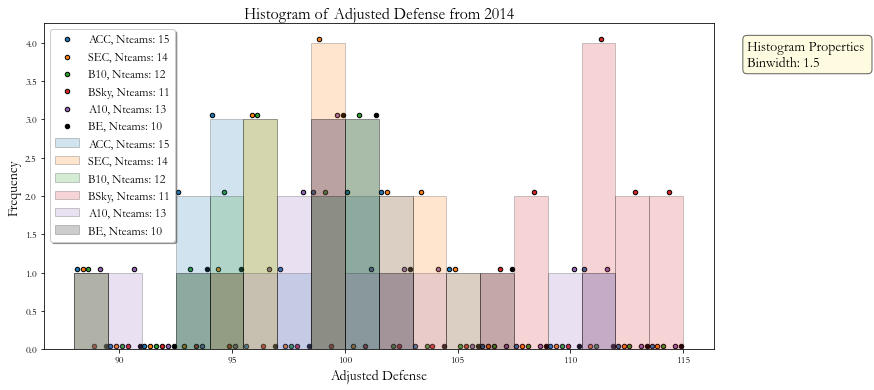

In [77]:
#we create our range for our plot. a little tedious 

x_mini = []
x_maxi = []
for i in range(len(collective_data_2014)):
    x_mini.append(min(collective_data_2014[i]['AdjD']))
    x_maxi.append(max(collective_data_2014[i]['AdjD']))

x_min = min(x_mini)
x_max = max(x_maxi)
binwidth = 1.5
dots = np.linspace(-binwidth/2+0.1,binwidth/2-0.1,len(conferences))
bins = np.arange(x_min, x_max + binwidth, binwidth)

plt.figure(figsize=(12, 6))



for i in range(len(collective_data_2014)):
    
    N_teams = len(collective_data_2014[i])
    hist, bins = np.histogram(collective_data_2014[i]['AdjD'], bins=bins)
    center = (bins[:-1] + bins[1:]) / 2
    
    plt.bar(center, hist, width=binwidth, edgecolor= 'black', color = colors[i] , alpha=0.2, label=conferences[i]+', Nteams: '+str(N_teams))


for i in range(len(collective_data_2014)):
    
    N_teams = len(collective_data_2014[i])
    hist, bins = np.histogram(collective_data_2014[i]['AdjD'], bins=bins)
    center = (bins[:-1] + bins[1:]) / 2
    
    plt.scatter(center+dots[i], hist+0.05, s=20, edgecolor= 'black', color = colors[i] , alpha=1, label=conferences[i]+', Nteams: '+str(N_teams))


   
        


plt.title('Histogram of Adjusted Defense from 2014', fontsize =  16)
plt.xlabel('Adjusted Defense', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)


# creating box content
textbox_content = f"Histogram Properties \nBinwidth: {binwidth}"
textbox_properties = dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="black", lw=1, alpha=100)

# Add the framed text box to the figure
plt.text(1.05, 0.95, textbox_content, fontsize=14, verticalalignment='top', 
         horizontalalignment='left', bbox=textbox_properties, transform=plt.gca().transAxes)

plt.legend(loc = "upper left", fontsize = 12, shadow = True, fancybox = True)
plt.show()

Exercise 2

In [78]:
def get_common_teams_and_adjO(data_2014, data_2009):
    # Sort both DataFrames based on 'Team' column
    data_2014_sorted = data_2014.sort_values(by='Team')
    data_2009_sorted = data_2009.sort_values(by='Team')

    # Find common teams
    common_teams = set(data_2014_sorted['Team']).intersection(set(data_2009_sorted['Team']))

    # Filter data for common teams
    common_teams_data_2014 = data_2014_sorted[data_2014_sorted['Team'].isin(common_teams)]
    common_teams_data_2009 = data_2009_sorted[data_2009_sorted['Team'].isin(common_teams)]
     

    # Extract 'AdjO' values for common teams
    adjO_values_2014 = common_teams_data_2014['AdjO']
    adjO_values_2009 = common_teams_data_2009['AdjO']

    return adjO_values_2014, adjO_values_2009





# Initialize matrices to store 'AdjO' values
adjO_matrix_2014 = []
adjO_matrix_2009 = []

for data_2014, data_2009 in zip(collective_data_2014, collective_data_2009):
    adjO_values_2014, adjO_values_2009 = get_common_teams_and_adjO(data_2014, data_2009)
    adjO_matrix_2014.append(adjO_values_2014.values)
    adjO_matrix_2009.append(adjO_values_2009.values)

# Convert lists to NumPy arrays
adjO_matrix_2014 = np.array(adjO_matrix_2014)
adjO_matrix_2009 = np.array(adjO_matrix_2009)



diff_AdjO = adjO_matrix_2014-adjO_matrix_2009 

diff_AdjO


<ipython-input-78-eb3501f8ea66>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjO_matrix_2014 = np.array(adjO_matrix_2014)
<ipython-input-78-eb3501f8ea66>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjO_matrix_2009 = np.array(adjO_matrix_2009)


array([array([  1.1,  -9.3,   7.2,   6.3,   4.4,  -0.6,  -2. ,   0.5, -10.6,
               11.3, -10.8,  -5. ])                                         ,
       array([ 1.9,  6. ,  3. ,  1.4, 13.6, 10.5, -0.8, -0.2, -7.5,  0.2,  2.8,
              -3.5])                                                           ,
       array([ -0.3,   8.7,  11.6,  11.7,   4.3,   5.7, -13.4,  -4. ,  -1.5,
               -2.1,   8.7])                                                ,
       array([ 8. ,  1.3,  3.3, -5.9, -1.4,  5.5, -6.9, 13.8,  3.2]),
       array([10.5, -4.6, 15.6,  8.6,  0.4,  4.9, -9.3, -1.5,  6.6,  3.9, 12.6]),
       array([ 4.1,  1.9, -7.4,  3.6, -1.9,  5.8,  1.9])], dtype=object)

In [79]:
AdjO_14_wo = np.array(get_common_teams_and_adjO(df_2014,df_2009)[0])
AdjO_09_wo = np.array(get_common_teams_and_adjO(df_2014,df_2009)[1])
diff_wo = AdjO_14_wo-AdjO_09_wo
mean_outsideconf = np.mean(AdjO_14_wo-AdjO_09_wo)
median_outsideconf = np.median(AdjO_14_wo-AdjO_09_wo)



Text(1.05, 0.95, 'Teams not in 5 conf\n mean: 2.62, median:1.85\n ACC\n: mean diff: -0.63, median diff: -0.05  \n  SEC\n: mean diff: 2.28, median diff: 1.65  \n  B10\n: mean diff: 2.67, median diff: 4.3  \n  BSky\n: mean diff: 2.32, median diff: 3.2  \n  A10\n: mean diff: 4.34, median diff: 4.9  \n  BE\n: mean diff: 1.14, median diff: 1.9  \n ')

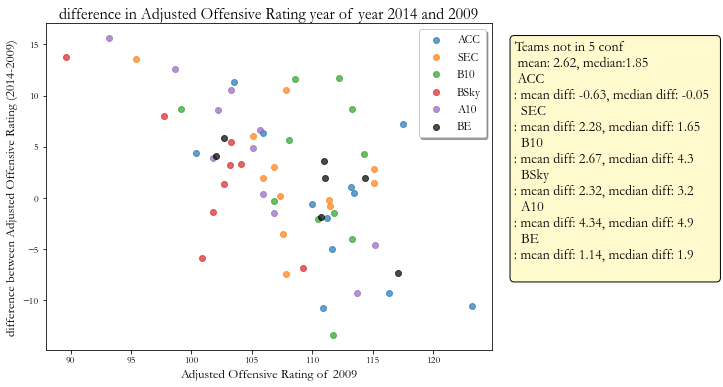

In [80]:
means = []
medians = []
plt.figure(figsize = (8,6))
textbox_content = f"Teams not in 5 conf\n mean: {round(mean_outsideconf,2)}, median:{round(median_outsideconf,2)}\n"

for i in range(len(conferences)):
    diff = diff_AdjO[i]
    plt.scatter(adjO_matrix_2009[i],diff, color = colors[i], alpha = 0.7, label = conferences[i] )
    
    plt.xlabel('Adjusted Offensive Rating of 2009', fontsize = 13)
    plt.ylabel('difference between Adjusted Offensive Rating (2014-2009)', fontsize=13)    
    plt.title('difference in Adjusted Offensive Rating year of year 2014 and 2009', fontsize =  16)
    mean = np.mean(diff)
    median = np.median(diff)
    textbox_content += f" {conferences[i]}\n: mean diff: {round(mean,2)}, median diff: {round(median,2)}  \n "

    

textbox_properties = dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="black", lw=1, alpha=1)
plt.legend(loc = "upper right",fontsize = 12, shadow = True, fancybox = True)
# Add the framed text box to the figure
#plt.text(150, 3.5, textbox_content, fontsize=14,
#verticalalignment='center', horizontalalignment='right', bbox=textbox_properties)
plt.text(1.05, 0.95, textbox_content, fontsize=14, verticalalignment='top', 
         horizontalalignment='left', bbox=textbox_properties, transform=plt.gca().transAxes)



